# Assignment 2

Modules used for the assignment

In [1]:
import io
import re
import os
import operator
import community
from collections import Counter
from collections import defaultdict
from bisect import bisect_left
import pandas as pd
import urllib2
import json
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from __future__ import division

%matplotlib inline

## Part 1: Advanced Network Structure
>We start by looking at the structure of the the philosopher network using the more complicated network measures. If your network has more than one component, just work on the _giant connected component_ (GCC) in the exercises below (in a directed graph use the [_weakly_ connected component](https://networkx.github.io/documentation/networkx-1.9.1/reference/algorithms.component.html)).

>Not all of the measures we'll be considering below are defined for directed graphs, thus begin by creating an [undirected version](https://networkx.github.io/documentation/networkx-1.9.1/reference/generated/networkx.DiGraph.to_undirected.html) of the philosopher graph, that we can use whenever needed. Only use the undirected graph when explicitly stated in the exercise.

#### As first step for Part1 exercises, we need to create list for philosophers and create a network for all the philosphers. Our assumption has been that we need to create a Directed Graph for philosophers and then a Giant Connected component (basically which is graph with maximum nodes and connections). Below are step by step execution of creating the network:
* List of philosophers
* Set of philosophers for each branch
* Creating matching connections of each philospher with other philosophers in the set
* Once we have links for each philosopher that's when we create the network - in this case a Directed Graph

In [2]:
list_of_philo=[] # This list will contain the branches.
list_of_list=[] # This list will a list for each branch which will contain all the names 
philo_loc = 'philo/'

for files in os.listdir(philo_loc):
    if files.endswith(".txt"):
        f = io.open(philo_loc+files, 'r', encoding='utf-8')
        link = re.findall(r'\*.*\[\[(.+?)\]\]?',f.read())
        name = []
        for k in link:
            name += [k.split('|')[0]]
        list_of_philo += [files.split('.')[0]]
        list_of_list += [name]
print list_of_philo

['aestheticians', 'epistemologists', 'ethicists', 'logicians', 'metaphysicians', 'political']


In [3]:
set_of_philosophers =set()

for branch in range(len(list_of_list)):
    for name in list_of_list[branch]:
        set_of_philosophers.add(name)

In [4]:
list_of_philosophers = list(set_of_philosophers)
match = []
json_loc = 'json/'

for philosoherps in list_of_philosophers:
    filename = philosoherps.replace(' ', '_')
    with io.open(json_loc+filename+".txt",'r',encoding='utf-8') as files:
        link = re.findall(r'\[\[(.+?)\]\]?',files.read())
        for item in link:
            item = item.split('|')[0]
            if item in list_of_philosophers:
                match.append((philosoherps, item))
print match[:10]

[(u'Christian Wolff (philosopher)', u'Gottfried Leibniz'), (u'Christian Wolff (philosopher)', u'Aristotle'), (u'Christian Wolff (philosopher)', u'Thomas Aquinas'), (u'Christian Wolff (philosopher)', u'Immanuel Kant'), (u'Christian Wolff (philosopher)', u'Alexander Gottlieb Baumgarten'), (u'Christian Wolff (philosopher)', u'Immanuel Kant'), (u'Christian Wolff (philosopher)', u'Gottfried Leibniz'), (u'Christian Wolff (philosopher)', u'Confucius'), (u'Christian Wolff (philosopher)', u'Voltaire'), (u'Christian Wolff (philosopher)', u'Voltaire')]


In [5]:
Full_DiG = nx.DiGraph()
Full_DiG.add_edges_from(match)

In [6]:
DiG = max(nx.weakly_connected_component_subgraphs(Full_DiG,copy=True),key=len)
UnG = DiG.to_undirected()

<hr>

#### Find the 5 most central philosophers according to [betweenness centrality](https://networkx.github.io/documentation/networkx-1.9.1/reference/generated/networkx.algorithms.centrality.betweenness_centrality.html). What role do you imagine philosophers with high wikipedia graph betweenness centrality play in the history of philosophy?

* We find the betweenness centrality using standard networkx function. We use the directed graph for this function. We then sort the dictionary and extract the top 5 central philosophers.

In [7]:
b_cen_dict = nx.betweenness_centrality(DiG)
sorted_b_cen = sorted(b_cen_dict.items(), key=operator.itemgetter(1),reverse=True)
for i in range(5):
    print "Philosopher: %s. \t Betweenness centrality value: %s." %(sorted_b_cen[i][0],sorted_b_cen[i][1])

Philosopher: Immanuel Kant. 	 Betweenness centrality value: 0.0883788716806.
Philosopher: Bertrand Russell. 	 Betweenness centrality value: 0.0772155196034.
Philosopher: David Hume. 	 Betweenness centrality value: 0.0570443633056.
Philosopher: Aristotle. 	 Betweenness centrality value: 0.0557721733381.
Philosopher: Plato. 	 Betweenness centrality value: 0.0532717870671.


**Betweenness centrality quantifies the number of times a node acts as a bridge along the shortest path between two other nodes. It was introduced as a measure for quantifying the control of a human on the communication between other humans in a social network. In his conception, vertices that have a high probability to occur on a randomly chosen shortest path between two randomly chosen vertices have a high betweenness.  In the philosopher network, a high value of betweenness centrality indicates that the work of the philosopher philosopher is highly referenced for his/her work by other philosophers in the community

<hr>

#### Find the 5 most central philosophers according to [eigenvector centrality](https://networkx.github.io/documentation/networkx-1.9.1/reference/generated/networkx.algorithms.centrality.eigenvector_centrality.html). Calculate centrality corresponding to both in- and out-edges (see NetworkX documentation for details). How is eigenvector centrality difference from degree centrality? Compare your results for eigenvector centrality to the results for betweenness centrality - does the difference make sense when you read the philosopher's wikipedia pages?

* For eigenvector centrality we use the standard networkx function. For out-edges we use the reverse function of the Directed graph and then calculate the eigen centrality.
* We then sort the dictionary items and extract the top 5 for both in and out edges

In [8]:
in_eig_cen = nx.eigenvector_centrality(DiG)
out_eig_cen = DiG.reverse()
out_eig_cen = nx.eigenvector_centrality(out_eig_cen)
sorted_in_eig_cen= sorted(in_eig_cen.items(), key=operator.itemgetter(1),reverse=True)
sorted_out_eig_cen= sorted(out_eig_cen.items(), key=operator.itemgetter(1),reverse=True)

In [9]:
for i in range(5):
    print "Philosopher: %s. \t \t in degree Eigenvector centrality value: %s." %(sorted_in_eig_cen[i][0],sorted_in_eig_cen[i][1])

Philosopher: Immanuel Kant. 	 	 in degree Eigenvector centrality value: 0.319880654521.
Philosopher: Aristotle. 	 	 in degree Eigenvector centrality value: 0.272656582395.
Philosopher: Bertrand Russell. 	 	 in degree Eigenvector centrality value: 0.24156788721.
Philosopher: Plato. 	 	 in degree Eigenvector centrality value: 0.219071695844.
Philosopher: Friedrich Nietzsche. 	 	 in degree Eigenvector centrality value: 0.202379848167.


In [10]:
for i in range(5):
    print "Philosopher: %s. \t \t out degree Eigenvector centrality value: %s." %(sorted_out_eig_cen[i][0],sorted_out_eig_cen[i][1])

Philosopher: Georg Wilhelm Friedrich Hegel. 	 	 out degree Eigenvector centrality value: 0.203208386646.
Philosopher: Martin Heidegger. 	 	 out degree Eigenvector centrality value: 0.189233785054.
Philosopher: Friedrich Nietzsche. 	 	 out degree Eigenvector centrality value: 0.187733490961.
Philosopher: Immanuel Kant. 	 	 out degree Eigenvector centrality value: 0.18273332905.
Philosopher: Michel Foucault. 	 	 out degree Eigenvector centrality value: 0.153020412693.


Eigen vector centrality helps us identify how many relevant/important nodes link through it i.e. the influence of the node in the community. If a node has higher in and out centrality e.g. Immanuel Kant and Martin Heidegger in this network, it tells us that both these philosophers's work/articles/philosphy and thought process were highly referenced in the network and had the highest influence. These two were important nodes as they were linked to other important nodes

** However in case of betweeness centrality, it only looks at how many links are connected to a node and nothing else. It doesn't tell us the importance of nodes being linked. This is the biggest difference between the two centrality

* It makes a lot of sense looking at both the centrality measures as we read through the philosopher's wikipedia pages.


The values from Eigenvector centrality... (see [Eigenvector centrality](http://www.sci.unich.it/~francesc/teaching/network/eigenvector.html) for more info)

<hr>

#### Is the _undirected version_ of the graph [assortative with respect do degree](https://networkx.github.io/documentation/networkx-1.9.1/reference/generated/networkx.algorithms.assortativity.degree_assortativity_coefficient.html#networkx.algorithms.assortativity.degree_assortativity_coefficient)? (e.g. do high-degree philosophers tend to link to other high-degree philosophers, and low-degree philosophers to other low-degree philosophers?). Provide an interpretation of your answer!

In [11]:
r = nx.degree_assortativity_coefficient(UnG)
print r

-0.0749333563328


** Assortativity is a preference for a network's nodes to attach to others that are similar in some way.
The assortativity coefficient is the Pearson correlation coefficient of degree between pairs of linked nodes. 

** Correlations between nodes of similar degree are often found in the mixing patterns of many observable networks. For instance, in social networks, nodes tend to be connected with other nodes with similar degree values. On the other hand, technological and biological networks typically show disassortative mixing, or dissortativity, as high degree nodes tend to attach to low degree nodes.

** Positive values of r indicate a correlation between nodes of similar degree, while negative values indicate relationships between nodes of different degree. In general, r lies between −1 and 1. 
When r = 1, the network is said to have perfect assortative mixing patterns, when r = 0 the network is non-assortative, while at r = −1 the network is completely disassortative.


** In our case we receive a negative value for assortativity which indicates that similar high-degree philosohers do not  tend to link to other high-degree philosophers. It also indicates that a network tends towards being non-assortative while still not being completely disassortative

<hr>

> We will now run community detection on the full philosopher network.

* Now we try to detect community within the branches and outside.
    * We first create six sets (one for each branch) to have all the nodes and their connections within the branches
    * As a next step we then determine all the matching connections for each node in different branches and then add them in each of the branches
    * We then remove the node from other branches where it has the minimum connections and keep it within the branch where it has maximum connections
    * Finally we find out the community detection using the modularity function of networkx. 

In [12]:
set_aes = set()
set_epi = set()
set_eth = set()
set_log = set()
set_met = set()
set_pol = set()

for i in range(len(list_of_list)):
    for item in list_of_list[i]:
        if i == 0:
            set_aes.add(item)
        elif i == 1:
            set_epi.add(item)
        elif i == 2:
            set_eth.add(item)
        elif i == 3:
            set_log.add(item)
        elif i == 4:
            set_met.add(item)
        else:
            set_pol.add(item)

In [13]:
xyz ={}
for i in range(len(match)):
    if xyz.has_key(match[i][0]):
        ph_str = str(match[i][0].encode('utf8'))
        if match[i][1] in set_aes:
            xyz[ph_str][0].add(match[i][1])
        elif match[i][1] in set_epi:
            xyz[ph_str][1].add(match[i][1])
        elif match[i][1] in set_eth:
            xyz[ph_str][2].add(match[i][1])
        elif match[i][1] in set_log:
            xyz[ph_str][3].add(match[i][1])
        elif match[i][1] in set_met:
            xyz[ph_str][4].add(match[i][1])
        elif match[i][1] in set_pol:
            xyz[ph_str][5].add(match[i][1])
    else:
        ph_str = str(match[i][0].encode('utf8'))
        xyz[ph_str] = [set(),set(),set(),set(),set(),set()]
for item in xyz['Eli Siegel']:
    print len(item)

2
0
1
0
0
0


In [14]:
list_of_sets = [set_aes,set_epi,set_eth,set_log,set_met,set_pol]
def delPhilo(key,index):
    for i in range(len(list_of_sets)):
        if index != i:
            list_of_sets[i].discard(key)

for key in xyz.keys():
    _ = max(enumerate(xyz[key]), key = lambda tup: len(tup[1]))
    delPhilo(key,_[0])
print len(set_aes),len(set_epi),len(set_eth),len(set_log),len(set_met),len(set_pol)

108 46 160 188 20 132


In [15]:
def getDeg (branch):
    links = 0
    degree = 0
    for i in range(len(match)):
        if match[i][0] in branch:
            if match[i][1] in branch:
                links = links + 1
            else:
                degree = degree + 1
    _ = [links, degree]
    return _

def getMod ():
    i = 0
    ii = 0
    list_of_set_str = ['set_aes','set_epi','set_eth','set_log','set_met','set_pol']
    for item in list_of_sets:
        _ = getDeg(item)
        Mod = (_[0]/len(set(match)))-(_[1]/(2*len(set(match))))**2
        print "The modularity for %s is %s." %(list_of_set_str[i],Mod)
        ii = Mod + ii
        i = i + 1
    print "The modularity for the whole network is %s." %ii
getMod()

The modularity for set_aes is 0.0555519537678.
The modularity for set_epi is 0.00652070892047.
The modularity for set_eth is 0.05778112768.
The modularity for set_log is 0.164654741876.
The modularity for set_met is 0.000363149013884.
The modularity for set_pol is 0.039812172423.
The modularity for the whole network is 0.324683853682.


** From the modularity values as calculated for the six branches of philosophy we can see that Logician branch has a higher modularity value implying that this branch seems to be a denser community as comparted to any other branch of philosophy. 

** On the contrary metaphysicians seems to be very weak community as the modularity value is very low

** However, modularity value for the entire philosopher network calculated is higher than the modularity of each branch. This implies here that as a whole philosopher network it has higher features/properties of a community as comparted to individual branches



##### Use [the Python Louvain-algorithm implementation](http://perso.crans.org/aynaud/communities/) to find communities in the full philosopher network. Report the value of modularity found by the algorithm. Is it higher or lower than what you found above for the branches as communities? What does this comparison reveal about the branches?
   * \[**Note**: This implementation is now available as Anaconda package. Install with `conda` as expained [here](https://anaconda.org/auto/python-louvain)\].
   * You can also try the *Infomap* algorithm instead if you're curious. Go to [this page](http://www.mapequation.org/code.html) and search for 'python'. It's harder to install, but a better community detection algorithm.

** We now use the Python Louvain algorith implementation to find communities in the full network. This requires an Undirected graph and hence we first convert a Directed Graph to undirected graph. We then use the algorithm to find the best partition in the entire undirected network and then finally calucluate the community modularity.

In [16]:
Full_UnG = Full_DiG.to_undirected()

In [17]:
part = community.best_partition(Full_UnG)# Use Loucian on full network
community.modularity(part, Full_UnG)# Print the value od modularity

0.4530719809236054

** Interestingly the value of philosopher community modularity is way higher than the individual modularity values of branches. This indicates that as a whole Philosopher network, the nodes are densely connected means have a high community properties while within inidividual branches they don't seem to be such strong communities except logicians

#### Compare the communities found by your algorithm with the branches of philosophy (see [Lecture 5](http://nbviewer.jupyter.org/github/suneman/socialgraphs2016/blob/master/lectures/Week5.ipynb) for details on the branches) by creating a matrix **_D_** with dimension (_B_ times _C_), where _B_ is the number of branches and _C_ is the number of communities. We set entry _D_(_i_,_j_) to be the number of nodes that branch _i_ has in common with community _j_. The matrix **_D_** is what we call a [**confusion matrix**](https://en.wikipedia.org/wiki/Confusion_matrix). Use the confusion matrix to explain how well the communities you've detected correspond to the labeled branches of philosophy.

** We compare the communities found by our algorithm with the branches. It determines that if the node is in the philosopher community and the same node exists in any branch, it adds an entry.

** As we analyze the matrix, interestingly it also determines that if the philosopher community has presence from multiple branches and logicians contribute the maximum in the community and metaphysicians the least which very well vindicates our earlier analysis of communities.

In [18]:
w, h = len(list_of_sets), len(set(part.values())) 
Matrix = [[0 for x in range(w)] for y in range(h)]
print w, h
for key in part.keys():
    if key in set_aes:
        Matrix[part[key]][0] =1
    elif key in set_epi:
        Matrix[part[key]][1] =1
    elif key in set_eth:
        Matrix[part[key]][2] =1
    elif key in set_log:
        Matrix[part[key]][3] =1
    elif key in set_met:
        Matrix[part[key]][4] =1
    elif key in set_pol:
        Matrix[part[key]][5] =1

for row in Matrix:
    print row

6 21
[1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 0, 1]
[1, 0, 1, 1, 1, 0]
[1, 1, 1, 1, 0, 1]
[1, 1, 1, 1, 1, 1]
[1, 0, 1, 0, 0, 1]
[1, 1, 1, 0, 0, 1]
[0, 0, 1, 0, 0, 0]
[1, 1, 1, 1, 0, 1]
[0, 0, 1, 0, 0, 1]
[0, 0, 0, 0, 0, 1]
[0, 0, 1, 1, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 1, 0, 0]
[0, 0, 0, 1, 0, 0]
[0, 0, 0, 1, 0, 0]
[0, 0, 0, 1, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 1, 0, 0, 0, 1]
[0, 0, 1, 0, 0, 0]
[0, 0, 0, 1, 0, 0]


# Part II: Human navigation paths 

* This exercise works on the wikispeedia dataset. For details on wikispeedia, see [Lecture 8](http://nbviewer.jupyter.org/github/suneman/socialgraphs2016/blob/master/lectures/Week5.ipynb) 

** For us to work on the datasets we had to first map the datasets. We are using panda library for mapping our datasets.  We ignore the headers and then provide names to the columns based on the mapping information as provided in each of the datasets

** In step2 we are demonstrating mapping for paths finished dataset

In [2]:
location_unf = 'wikispeedia_paths-and-graph/paths_unfinished.tsv'
location_fin = 'wikispeedia_paths-and-graph/paths_finished.tsv'
location_links = 'wikispeedia_paths-and-graph/links.tsv'

df1 = pd.read_csv(location_unf, sep='\t',encoding='utf-8',skiprows=16, 
                  names=['hashedIpAddress','timestamp','durationInSec','path','target','type'])
df2 = pd.read_csv(location_fin, sep='\t',encoding='utf-8',skiprows=16, 
                  names=['hashedIpAddress','timestamp','durationInSec','path','rating'])
df3 = pd.read_csv(location_links, sep='\t',encoding='utf-8',skiprows=12, 
                  names=['linkSource','linkTarget'])

In [3]:
df2[:5]

,hashedIpAddress,timestamp,durationInSec,path,rating
0,6a3701d319fc3754,1297740409,166,14th_century;15th_century;16th_century;Pacific...,NaN
1,3824310e536af032,1344753412,88,14th_century;Europe;Africa;Atlantic_slave_trad...,3
2,415612e93584d30e,1349298640,138,14th_century;Niger;Nigeria;British_Empire;Slav...,NaN
3,64dd5cd342e3780c,1265613925,37,14th_century;Renaissance;Ancient_Greece;Greece,NaN
4,015245d773376aab,1366730828,175,14th_century;Italy;Roman_Catholic_Church;HIV;R...,3


** As we evaluated the datasets we found that in 'finished paths' dataset we find a path for 'Wikipedia_Text_of_the_GNU_Free_Documentation_License' which is not part of the links dataset and hence is not considered as a node in the network. However since it is part of the paths navigated, in our calculations below we wanted to ignore all the records that had this link as a path. Below step indicates our process to identify all such rows and removing them from the 'paths finished' dataset.

In [4]:
invalid_node = 'Wikipedia_Text_of_the_GNU_Free_Documentation_License'
count = 0

for row in range(len(df2)):
    row_str = df2.get_value(row,'path')
    row_split = row_str.split(';')
    if invalid_node in row_split:
        df2.drop(df2.index[row-count], inplace=True)
        count += 1
        
df2.reset_index(inplace=True)

### IIa: Path lengths

> The first thing we want to take a look at is path lengths. NetworkX allows us to calculate the shortest path between any pair of articles. We begin by comparing the length of human and shortests paths. 

* For each _source_/_target_ pair in the list of human navigation paths, calculate the shortest path using NetworkX. Plot the distribution of path lengths.

** To calculate the source/target pair list of human navigation paths, the steps followed are:

* We create a directed graph and then for the links we add edges to the network.
* We then find out the shortest path length for the directed graph using the networkX function
* For plotting the distribution we need the frequency of each path. For that we calculate the frequency by identifying the number of times a node has been part of the paths
* We then plot the frequency with the shortest paths 

In [5]:
DG = nx.DiGraph()
count = 0
for row in df3.itertuples():
    DG.add_edge(row[1],row[2])

In [6]:
p=nx.shortest_path_length(DG)

In [7]:
list_of_numbers = []
i = 0
for source_node in p:
    for key in p[source_node]:
        list_of_numbers.append(p[source_node][key])

In [8]:
d_freq = Counter(list_of_numbers)

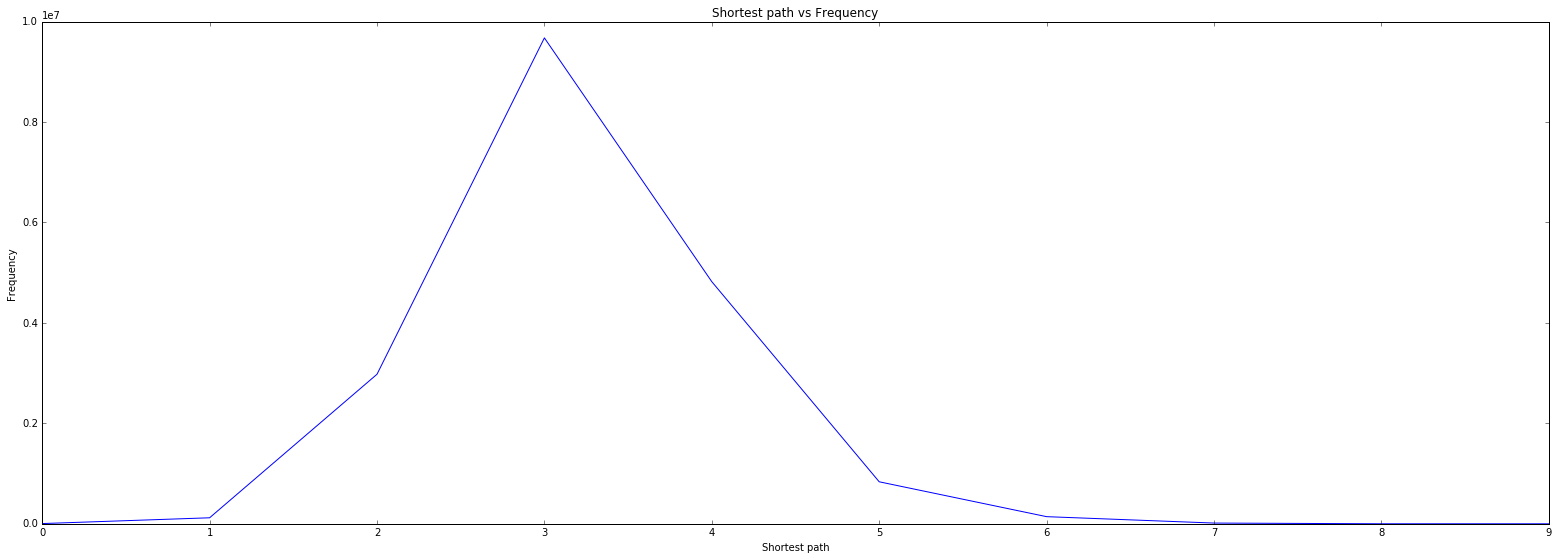

In [9]:
plt.figure(num=None, figsize=(27, 9), dpi=1200)
plt.plot(d_freq.keys(),d_freq.values())
plt.ylabel('Frequency')
plt.xlabel('Shortest path')
plt.title('Shortest path vs Frequency')

#### For each _source_/_target_ pair, calculate the length of the human path. The dataset contains information on people who regret a navigation step and hit the "back" button in their web-browser. It's up to you how to incorporate that information in the path. Justify your choice. Plot the distribution of human path lengths. 

** For Human path we create a similar list considering only the 'finished path' dataset. Our understanding is that in each of the path - path length is equal to the number of links it took for a user to reach the target which also includes regret of navigation step/s. Our belief is that humans are bound to commit mistakes during navigation and hence such back button paths need to be considered in the overall path length. Hence we have included all the paths post the target node as part of the human path length. 

** Our path length formula = count of all nodes (including regret nodes) (source --> target) - 1 (source node)

** Means we have excluded source node from the overall path length calculation but included target node as part of it

In [10]:
list_of_human_path = []
for row in range(len(df2)):
    list_of_human_path.append(df2.get_value(row,'path').count(';'))

In [11]:
human_path_freq = Counter(list_of_human_path)

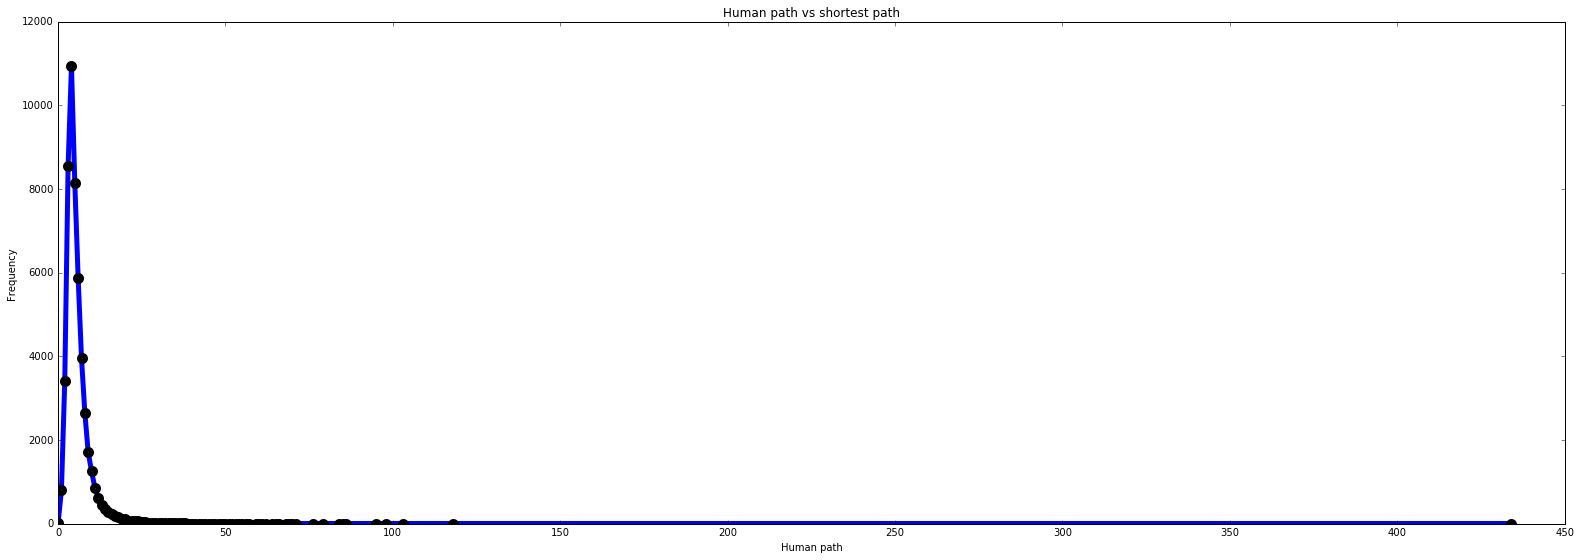

In [12]:
plt.figure(num=None, figsize=(27, 9), dpi=10)
plt.plot(human_path_freq.keys(),human_path_freq.values(),human_path_freq.keys(),human_path_freq.values(),'o',lw=5,mew=5)
plt.ylabel('Frequency')
plt.xlabel('Human path')
plt.title('Human path vs shortest path')

#### How much longer are the human paths on average?

** We calculate this by subtracting the mean of human path from mean of short path

In [13]:
human_path_mean = sum(list_of_human_path)/len(list_of_human_path)
shor_path_mean = sum(list_of_numbers)/len(list_of_numbers)

print 'The human path is %s longer than shorest path on average.' %(human_path_mean-shor_path_mean)

The human path is 2.5506864827 longer than shorest path on average.


<hr>

#### Create scatter plot where each point is a _source_/_target_ pair, and you have human path lengths on the $x$-axis and shortests paths on the $y$-axis.

In [14]:
path_visited = {}
list_of_shortpath = []
def findShortPath(pair):
    if pair in path_visited.keys():
        list_of_shortpath.append(path_visited[pair])
    else:
        source = pair.split(',')[0]
        target = pair.split(',')[1]
        try:
            _ = len(nx.shortest_path(DG, source=source, target=target))-1
            path_visited[pair] = _
            list_of_shortpath.append(_)
        except:
            print 'Node do not exist.'

In [15]:
for row in range(len(df2)):
    row_str = df2.get_value(row,'path')
    row_split = row_str.split(';')
    source = row_split[0].decode('utf-8')
    target = row_split[len(row_split)-1].decode('utf-8')
    pair = source+','+target
    findShortPath(pair)

In [33]:
print len(list_of_human_path),len(list_of_shortpath)

51280 51280


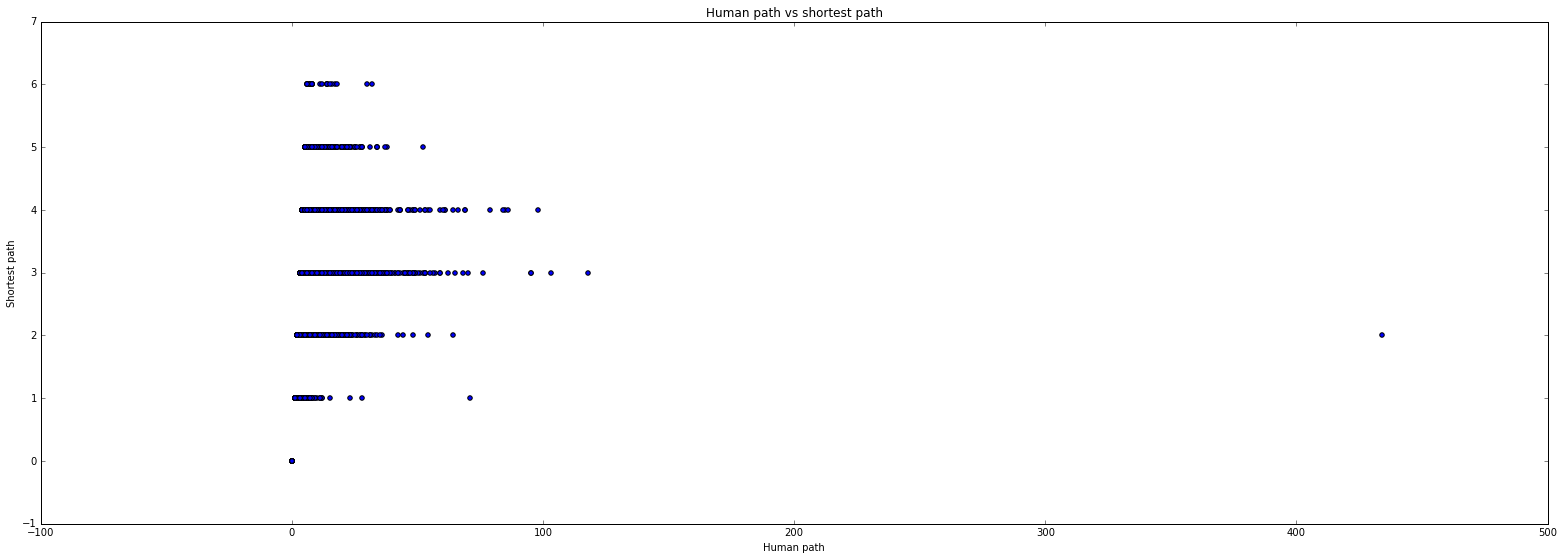

In [34]:
plt.figure(num=None, figsize=(27, 9))
plt.scatter(list_of_human_path,list_of_shortpath)
plt.ylabel('Shortest path')
plt.xlabel('Human path')
plt.title('Human path vs shortest path')

#### Is there a correlation between human/shortest path-lengths? What is the correlation.

** Shortest path is evaluated considering the most optimum path mathematically. However it doesn't consider the heterogeneity of users and limitations in their knowledge about the subject and their ability to identify the most relevant next link. Many factors such as familiarity of the link or name of the node could also affect clicking of link. These factors, together with the imperfections in users' perception and reasoning capacity, seems to have pushed users away from the shortest path. There are few users who could find the target very closely with the shortest path, but many users took a long route as compared to the shortest path.

### IIb: Betweenness

* An interesting definition of centrality is _betweenness centrality. In a traditional setting, this measure calculates all shortest paths in the network and then each node gets a score according to which fraction of all shortest paths pass through that node.

* In this part of the assignment, we create our own version of centrality, based on the _source_/_target_ pairs in our dataset. We define a nodes's **navigation centrality** as follows. 

*Navigation centrality* of node i is the fraction of all naviagtion paths that pass through i. We exclude the source and target from the count. If a node has not been visited by a search, the navigation centrality of that node is defined to be zero.

* Below, we investigate the relationship between navigation centrality and betweenness centrality.

>Begin by calculating the betweenness centrality and navigation centrality of all nodes in the wikispedia dataset.
Note that calculating the betweenness centrality can take quite a long time, so you might start it running in a separate notebook while first estimating it based on the existing human path.

* First, list the 5 pages with highest navigation centrality.

##### We calculate the navigation centrality by counting frequency of every node that falls in finished path dataset while excluding the source and target nodes. 

In [35]:
##### Calculate navigation centrality
navi_path = []
for row_number in range(len(df2)):
    row_str = df2.get_value(row_number,'path')
    row_split = row_str.split(';')
    if len(row_split) < 3:
        pass
    else:
        end_point = len(row_split)-1
        for node in range(1,end_point):
            current_node = row_split[node].decode('utf-8')
            if current_node != '<':
                navi_path.append(current_node)
            
# Dict containing the navigation centrality for each node.
navi_cen = Counter(navi_path)

In [36]:
#Find every unique node
uni_node = set()
for row in df3.itertuples():
    uni_node.add(row[1])
    uni_node.add(row[2])

#Add nodes which have a navigation centrality of zero
for node in uni_node:
    if node not in navi_cen.keys():
        navi_cen[node] = 0
print len(navi_cen)

4592


In [39]:
#listing the first five pages with highest navigation centrality
print "Node \t\t\t Navigation_centrality \n"
for pair in navi_cen.most_common(5):
    if len(pair[0]) > 6:
        print "%s \t\t %s" %(pair[0],pair[1])
    else:
        print "%s \t\t\t %s" %(pair[0],pair[1])

Node 			 Navigation_centrality 

United_States 		 8814
Europe 			 4317
United_Kingdom 		 3859
Earth 			 3153
England 		 3121


### Second, list the 5 pages with highest betweenness centrality.

In [40]:
be_cen = nx.betweenness_centrality(DG)

### * Compare the two lists. Explain the differences between the two lists in your own words.

In [41]:
sorted_be_cen = sorted(be_cen.items(), key=operator.itemgetter(1), reverse=True)
print "Node \t\t\t Betweenness centrality \n"
for i in range(5):
    if len(sorted_be_cen[i][0]) > 6:
        print "%s \t\t %s" %(sorted_be_cen[i][0],sorted_be_cen[i][1])
    else:
        print "%s \t\t\t %s" %(sorted_be_cen[i][0],sorted_be_cen[i][1])

Node 			 Betweenness centrality 

United_States 		 0.0940903732139
United_Kingdom 		 0.0423844487843
England 		 0.032402812854
Europe 			 0.0269916994737
Africa 			 0.0242041761902


#### To add more comment here - Shishupal

** It seems that the nodes(links) with a high navigation centrality are the ones with also a high betweenness centrality. All of these seems to be very familiar names with United States and United Kingdom being navigated the most. 

<hr>
### Create a scatterplot of betweenness centrality vs. navigation centrality.

In [42]:
sorted_navi_cen = sorted(navi_cen.items(), key=operator.itemgetter(0))
sorted_be_cen = sorted(be_cen.items(), key=operator.itemgetter(0))

In [43]:
print len(sorted_navi_cen),len(sorted_be_cen)

4592 4592


In [44]:
navi_values = []
be_values = []
#Check if nodes do not match
for i in range(len(sorted_navi_cen)):
    if sorted_navi_cen[i][0] != sorted_be_cen[i][0]:
        print i
    else:
        navi_values.append(sorted_navi_cen[i][1])
        be_values.append(sorted_be_cen[i][1])

(0, 9000)

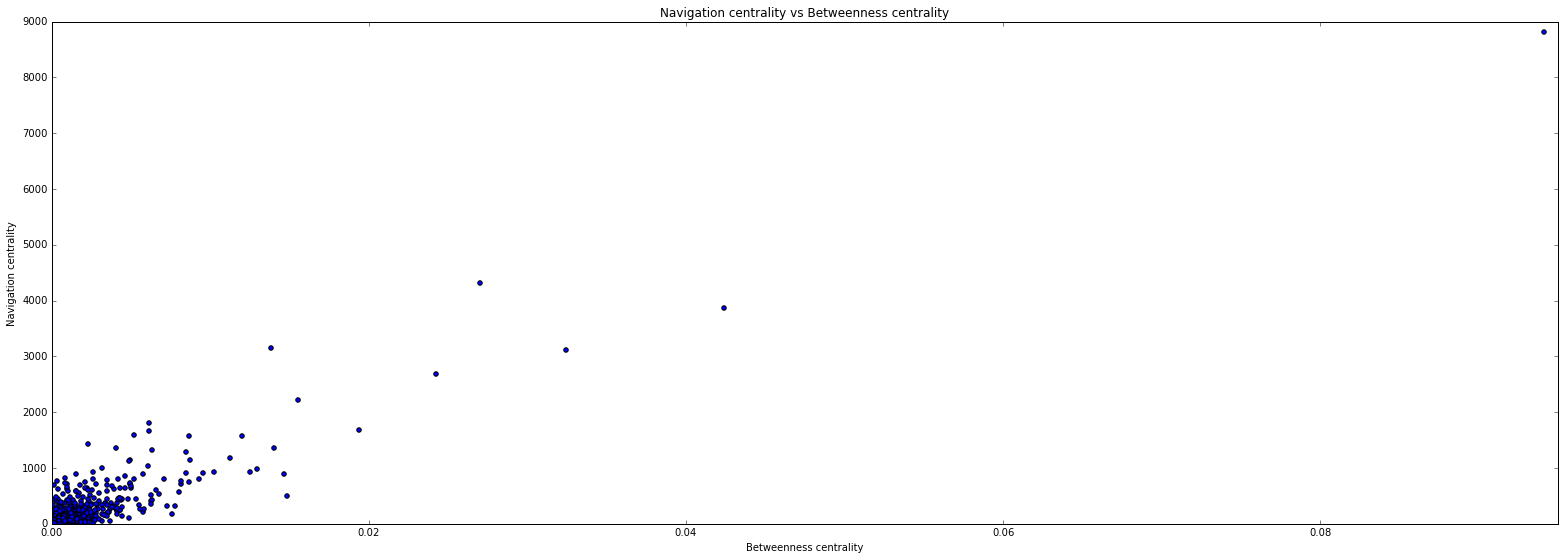

In [45]:
plt.figure(figsize=(27, 9))
plt.scatter(be_values,navi_values)
plt.ylabel('Navigation centrality')
plt.xlabel('Betweenness centrality')
plt.title('Navigation centrality vs Betweenness centrality')
plt.xlim(0, 0.095)
plt.ylim(0,9000)

<hr>
### Let's explore the pages that have navigation centrality equal to zero.
  * How many pages have zero navigation centrality?
  * What is the the page with zero navigation centrality and highest betweenness centrality? Can you explain why no human navigated to this page? Can you explain why the page is central in the actual link network? (For example, you can take a look at the degree of the node).
  * Plot the distribution of betweenness centrality for the pages with zero navigation centrality. 

In [46]:
count = 0
for number in navi_cen.values():
    if number is 0:
        count = count +1
print 'The amount of pages that have zero navigation centrality is %s.' %count

The amount of pages that have zero navigation centrality is 1187.


In [47]:
page_high_be = 0
page_name = ''
for page in navi_cen.keys():
    if navi_cen[page] is 0 and be_cen[page] > page_high_be:
        page_name = page
        page_high_be = be_cen[page]
print page_name,page_high_be

TGV 0.00112415650755


In [48]:
print DG.degree('TGV'),DG.in_degree('TGV'), DG.out_degree('TGV')

49 11 38


In [49]:
navi_be_cen = {}
for page in navi_cen.keys():
    if navi_cen[page] is 0:
        navi_be_cen[page] = be_cen[page]

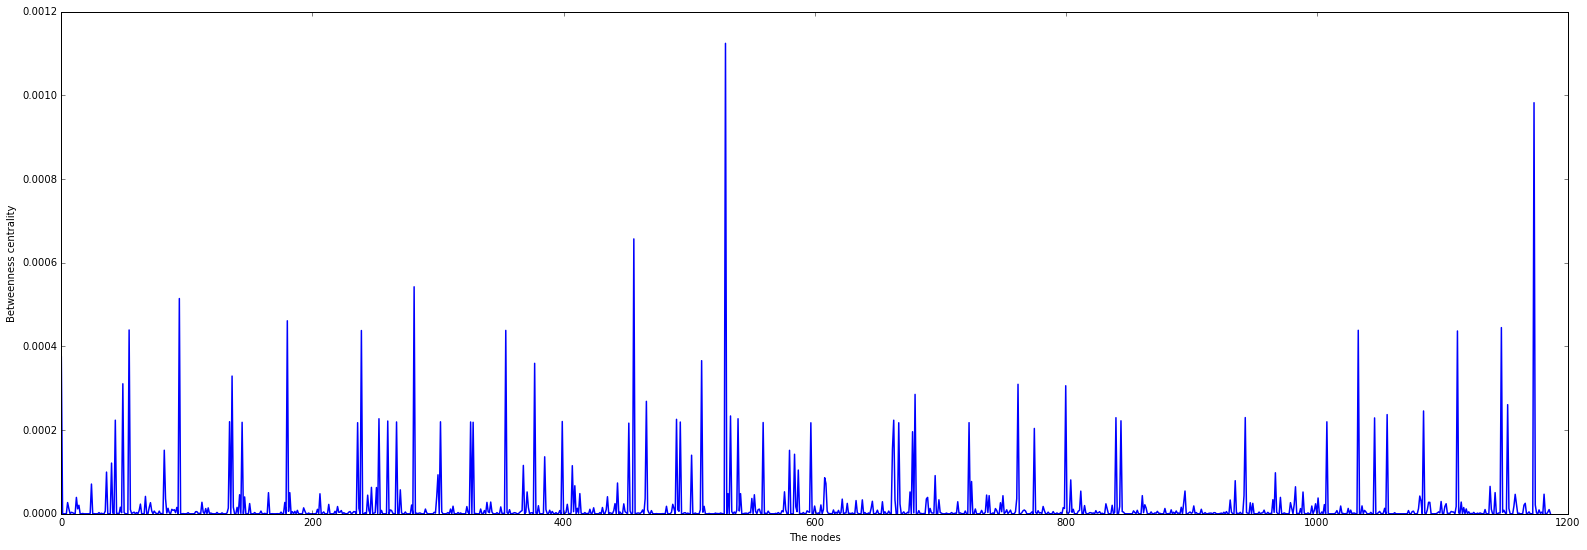

In [50]:
plt.figure(figsize=(27, 9))
plt.plot(navi_be_cen.values(),lw=1.5)
plt.ylabel('Betweenness centrality')
plt.xlabel('The nodes')

### Now, let's throw out all pages with zero navigation centrality and compare navigation- and betweenness centrality for the remaining pages.
What is the correlation between betweenness centrality and navigation centrality?
Comment on the top 5 outliers.

In [51]:
non_zero_navi_path = Counter(navi_path)
zero_navi_be_cen = be_cen
list_node_zero_navi = []
for node in uni_node:
    if node not in non_zero_navi_path.keys():
        list_node_zero_navi.append(node)
for node in list_node_zero_navi:
    zero_navi_be_cen.pop(node,None)

print len(non_zero_navi_path),len(zero_navi_be_cen)

3405 3405


In [52]:
sorted_zero_navi_be_cen = sorted(zero_navi_be_cen.items(), key=operator.itemgetter(0))
sorted_non_zero_navi_path = sorted(non_zero_navi_path.items(), key=operator.itemgetter(0))

In [53]:
zero_navi_values = []
zero_be_values = []
#Check if nodes do not match
for i in range(len(sorted_zero_navi_be_cen)):
    if sorted_zero_navi_be_cen[i][0] != sorted_non_zero_navi_path[i][0]:
        print i
    else:
        zero_navi_values.append(sorted_non_zero_navi_path[i][1])
        zero_be_values.append(sorted_zero_navi_be_cen[i][1])

(2500, 9000)

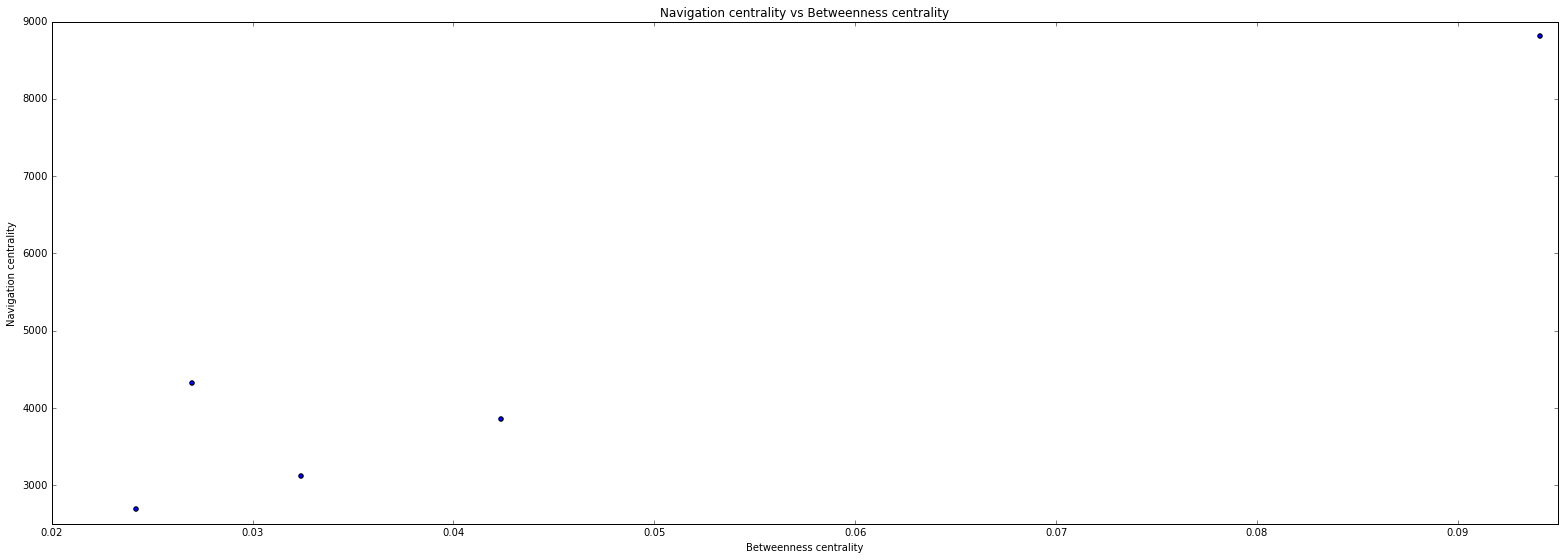

In [54]:
plt.figure(figsize=(27, 9))
plt.scatter(zero_be_values,zero_navi_values)
plt.ylabel('Navigation centrality')
plt.xlabel('Betweenness centrality')
plt.title('Navigation centrality vs Betweenness centrality')
plt.xlim(0.02, 0.095)
plt.ylim(2500,9000)

### IIc: Bringing the text into the picture
Now that we have an idea about the differences between how humans and computers search in networks, we are going to dig a little deeper using the page content to test a hypothesis to explain why the human navigation paths are longer. The general idea is that humans (who don't know about the global network structure) tend to jump between pages that have related content. For this reason we expect that (on average) human navigation paths have more similar content than the shortest paths in the network (which might take 'surprising' shortcuts via relatively unrelated pages). In short.

First, we will create the TF-IDF matrix for the articles. We will use the tfidf vectorizer from sk-learn library, that creates a Matrix with a TD-IDF vectors of the documents as lines and the different words as columns. The word list is created with the bag-of-words approach, and the stopwords are ignored. 

In [6]:
import os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import math

textList = []
textDict = {}
path = "./wikispeedia_articles_plaintext/plaintext_articles/"

for fi in os.listdir(path):
        with open(path + fi) as ff:
            #List of the articles in plaintext
            textList += [ff.read()]
            name = fi.split('.txt')[0]
            #Dict of the article's title associated with its index
            textDict[name] = len(textList)

print len(textList)

#TF-IDF matrix with the articles
vectorizer = TfidfVectorizer(analyzer='word', stop_words='english')
TfIdf = vectorizer.fit_transform(textList)

4604


Then, in order to compare the different articles, we create a function that take the two article's names, and that returns the cosine similiraty of the two associated TF-IDF vectors. 

In [7]:
def cosineSim(page1, page2):
    """Retruns the cosine similarity of the tf-idf vectors of the 2 given wiki pages"""
    #Page numbers from the dict
    n1 = textDict[page1] - 1
    n2 = textDict[page2] - 1
    #tf idf vectors
    vector1 = TfIdf[n1]
    vector2 = TfIdf[n2]
    #dotproduct of the vectors
    return cosine_similarity(vector1,vector2)[0][0]

Calculate the average similarity for all human navigation paths (the source/target pairs from above). Calculate mean/variance of these average similarities.

In [8]:
from statistics import mean, variance

In [9]:
#list of average similarity
similHuman = {}

for row in range(len(df2)):
    #for every finished human path
    humanPath = df2.get_value(row,'path').split(';')
    
    #Finds the real path without the backs
    humanPathReal = []
    for ii in range(len(humanPath)):
        if humanPath[ii] == '<':
            del(humanPathReal[-1])
        else:
            humanPathReal += [humanPath[ii]]
    
    source = humanPathReal[0]
    target = humanPathReal[-1]
    x = textDict[source]
    y = textDict[target]
    simPath = []
    
    if not source == target:
        #gives the average similarity for the human path
        for jj in range(len(humanPathReal)-1):
            #Compare the consecutive pages
            simPath += [cosineSim(humanPathReal[jj], humanPathReal[jj+1])]

        try:
            similHuman[source+';'+target] += [mean(simPath)]
        except KeyError:
            similHuman[source+';'+target] = [mean(simPath)]
        except:
            print humanPathReal
        
print len(similHuman)

28695


In [13]:
for index in similHuman.keys():
    av = mean(similHuman[index])
    similHuman[index] = av

In [15]:
print mean(similHuman.values())
print variance(similHuman.values())

0.164903706619
0.00481995372571


Calculate the average similarity for all shortest paths between the source/target pairs. Calculate mean/variance of these average similarities.


In [17]:
similShortest = []

for ppair in similHuman.keys():
    source = ppair.split(';')[0]
    target = ppair.split(';')[1]

    #Gives the average similarity for the shortest path
    shortestPath = nx.shortest_path(DG,source = source, target = target)
    for kk in range(len(shortestPath)-1):
        #Compare the consecutive pages
        simPath += [cosineSim(shortestPath[kk], shortestPath[kk+1])]
    try:
        similShortest += [mean(simPath)]
    except:
        pass
    
print len(similShortest)

28695


In [18]:
print mean(similShortest)
print variance(similShortest)

0.103249877412
8.0246915213e-07


Plot the distributions of average similarities for both human- and shortest paths in a single plot. 

In [23]:
humanCount = Counter([round(xx, 2) for xx in similHuman.values()])
shortestCount = Counter([round(xx,4) for xx in similShortest])

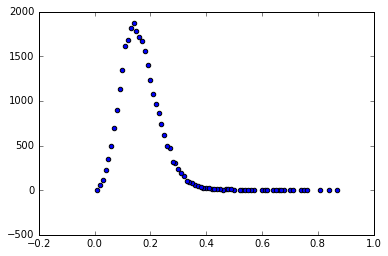

In [30]:
plt.scatter(humanCount.keys(),humanCount.values())
plt.show()

## Part 3

We will use the [LabMT wordlist](http://journals.plos.org/plosone/article/asset?unique&id=info:doi/10.1371/journal.pone.0026752.s001) in order to evaluate the sentiment of a given text. 

This wordlist was generated with Amazon Mechanical Turk, a crowdsourcing platform where real people perform simple tasks that are to hard for computers. Then, this list gives the "happiness level" of each word, based on 50 real user evaluations. It also gives a ranking for the utilisation of a given word in 4 sources: Twitter, Google Books, NYT, and Song Lyrics.

In [31]:
import nltk
import csv
with open('Data_Set_S1.txt','r') as fi:
    #Get a dtict of the words and the sentiment value associated
    labMT = csv.reader(fi, delimiter = '\t')
    labMT = {x[0]:x[2] for x in labMT}

In [32]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


Based on the LabMT word list, write a function that calculates sentiment given a list of tokens (the tokens should be lower case, etc). The function should complain if there are no words with sentiment attached.

In [33]:
def Sentiment(tok):
    """Returns the average sentiment score of a given text"""
    sentiment = 0    #Returned value
    n = 0 #number of words with sentiment attached
    for word in tok:
        try:
            #if the word is found in te list, append its value
            sentiment += float(labMT[word])
            n += 1
        except:
            pass    
    try:
        #If no word found (n=0), raise an error
        return sentiment / n
    except:
        return float('nan') #No word with sentiment attached in the text

Calculate a sentiment profile for the novels in NLPP1e chapter 1. The sentiment profile has sentiment on the y-axis and position in the text on the x-axis. Use a moving average to show how the sentiment changes. Create profiles for sliding windows of length 15 words, 50 words, 100 words, 500 words.

In [37]:
def SentimentAv(tok,window):
    """Returns a list of sentiment value in a sliding window"""
    sList = []
    win = window//2
    for ii in range(win, len(tok) - win):
        sList += [Sentiment(tok[ii-win : ii+win])]
    return sList

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

def SentimentProfile(text):
    """Show the sentiment profiles for the different windows"""
    
    winList = [15, 50, 100, 500]
    
    #Create subplots
    fig, ax = plt.subplots(1, 4, figsize=(17, 4.5))
    fig.suptitle(text.name, fontsize=14)
    
    for i in range(len(winList)):
        ax = plt.subplot(2, 4, i + 1)
        ax.set_title(winList[i])

        score = SentimentAv(text, winList[i])
        ax.plot([ii for ii in range(len(score))], score)

    fig.show()

C:\Anaconda2\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


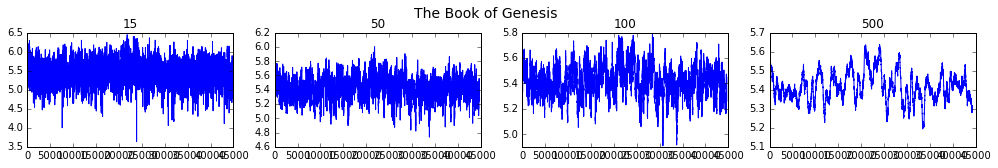

In [39]:
SentimentProfile(text3)

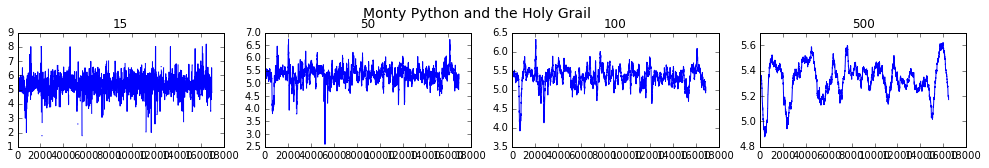

In [40]:
SentimentProfile(text6)

We can clearly see that each text has its propoer sentiment profile, esecially with a window of 500 words. For example with text6 (Monty Python and the Holy Grail), one can dsitinguish the scenes with a happier tone from the other.

Having a larger window has two effects:
* it reduces the noise, so the global sentiment of the scene or the chapter for example appears more clearly
* but it also smoothes the curve: hence, stronger sentences or words disappear with the average. The max values are then 